Example Session: Working with Spectral Cubes
============================================

This is a quick demo of how you can work with Spectral Cube objects

In [ ]:
%pip install -r https://github.com/radio-astro-tools/tutorials/raw/master/requirements.txt

In [1]:
# Intro stuff: imports!
import os
from astropy.io import fits
from astropy import wcs
from astropy import units as u
import spectral_cube

In [2]:
# Download the file to the present directory, but cache it in the astropy cache directory too
url = 'http://grunt.bu.edu/grs-stitch/source/grs-50-cube.fits'
from astropy.utils.data import download_file
def download_file_locally(url):
    fn = os.path.split(url)[1]
    if os.path.exists(fn):
        return fn
    else:
        f = download_file(url, cache=True)
        os.symlink(f, fn)
    return fn
            
fn = download_file_locally(url)

SpectralCube knows about and respects cube-related FITS standards
fits.gsfc.nasa.gov/fits_standard.html

There is a minor error in the GRS cube we downloaded: `CTYPE3` is specified as `VELOCITY`, which is not a valid specification.  It is not clear whether the correct type is Radio Velocity (most likely) or Apparent Relativistic Velocity, so we'll pick Radio Velocity.  The difference is small (<<1 pixel) in this case.

In [3]:
hdu = fits.open(fn)[0]
print "Incorrect FITS: ",hdu.header['CTYPE3']
print "Correcting to VRAD"
hdu.header['CTYPE3'] = 'VRAD'

Incorrect FITS:  VELOCITY
Correcting to VRAD


We then read the HDU object from memory.  If the FITS header didn't have any errors, we would just read the file directly from disk,

In [4]:
# cube = spectral_cube.SpectralCube.read(fn)
cube = spectral_cube.SpectralCube.read(hdu)

We now extract a subset of the data, selecting a sub-cube over the range 55 to 70 km/s

In [5]:
slab = cube.spectral_slab(55*u.km/u.s, 70*u.km/u.s)

Compute the first moment of this slab

In [6]:
mom0 = slab.moment0()

/Users/adam/virtual-python/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


We want to display it, so we import matplotlib and aplpy

In [7]:
%matplotlib inline
import aplpy
import pylab as pl

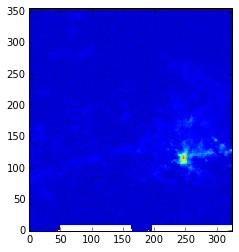

In [8]:
pl.imshow(mom0.value, vmax=1e5)

INFO:astropy:Auto-setting vmin to -4.132e+03
INFO:astropy:Auto-setting vmax to  2.603e+04


INFO: Auto-setting vmin to -4.132e+03 [aplpy.aplpy]
INFO: Auto-setting vmax to  2.603e+04 [aplpy.aplpy]


/Users/adam/repos/aplpy.git/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


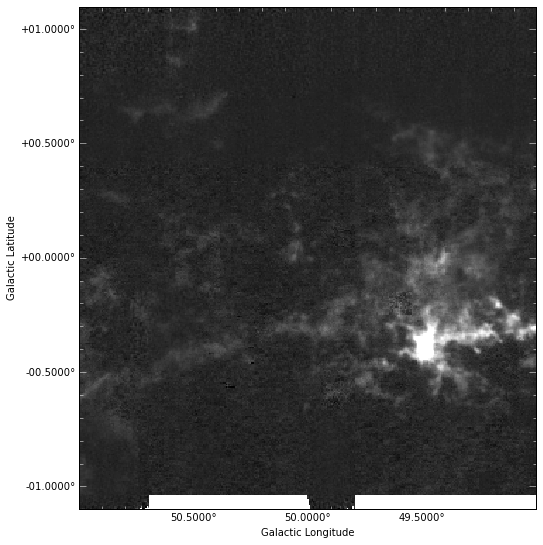

In [9]:
F = aplpy.FITSFigure(mom0.hdu)
F.show_grayscale()

We can then have a look at the 0'th moment along the other axes too

In [10]:
moms = [cube.moment0(axis=ii) for ii in range(cube.ndim)]

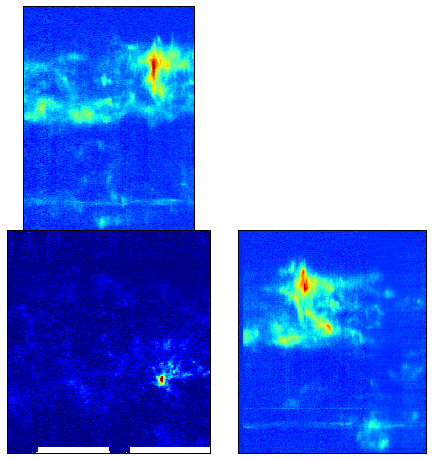

In [11]:
pl.figure(figsize=(8,8))
pl.subplot(2,2,1)
pl.imshow(moms[1].value)
pl.subplot(2,2,3)
pl.imshow(moms[0].value, vmin=-0.1, vmax=100000)
pl.subplot(2,2,4)
pl.imshow(moms[2].value)
pl.subplots_adjust(hspace=0,wspace=0)
for ii in (1,3,4):
    sp = pl.subplot(2,2,ii)
    sp.xaxis.set_visible(False)
    sp.yaxis.set_visible(False)